# <center>Magdalena Szarafin - Medical Cost Analysis - AI Bootcamp</center>

### Importing Required Libraries

In [1]:
!pip install datatile
!pip install tensorflow --ignore-installed --user

  Using cached tensorflow-2.10.0-cp39-cp39-win_amd64.whl (455.9 MB)
  Using cached wrapt-1.14.1-cp39-cp39-win_amd64.whl (35 kB)
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Using cached absl_py-1.2.0-py3-none-any.whl (123 kB)
  Using cached h5py-3.7.0-cp39-cp39-win_amd64.whl (2.6 MB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached grpcio-1.49.1-cp39-cp39-win_amd64.whl (3.6 MB)
  Using cached tensorflow_io_gcs_filesystem-0.27.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached numpy-1.23.3-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached flatbuffers-22.9.24-py2.py3-none-any.whl (26 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account al

In [2]:
!pip3 show tensorflow

Name: tensorflow
Version: 2.10.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\mszar\appdata\roaming\python\python39\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


In [3]:
# import necessary libraries
import pandas as pd
import numpy as np
from datatile.summary.df import DataFrameSummary

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

print("done")

C:\Users\mszar\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


done


### Exploratory Data Analysis (EDA)

In [4]:
# read the csv file 
insurance_df = pd.read_csv("insurance.csv")

In [5]:
# head of the DataFrame
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


DataFrame related to the insurance domain. The dataset contains:<br>
- 1338 rows and 7 columns<br>

The following variables are independent ones:<br>

- age<br>
- sex<br>
- bmi<br>
- children<br>
- smoker<br>
- region<br>

Dependent (target) variable:<br>
- charges

It is going on a regression problem here: we need to predict the cost of person's health insurance based on the given variables.

In [6]:
# dimensionality of the DataFrame
insurance_df.shape

(1338, 7)

In [7]:
# check if there are any Null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# concise summary of the DataFrame
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# quick exploration of the data
dfs = DataFrameSummary(insurance_df)
dfs.summary()

,age,sex,bmi,children,smoker,region,charges
count,1338.0,NaN,1338.0,1338.0,NaN,NaN,1338.0
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.04996,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.0,NaN,15.96,0.0,NaN,NaN,1121.8739
25%,27.0,NaN,26.29625,0.0,NaN,NaN,4740.28715
50%,39.0,NaN,30.4,1.0,NaN,NaN,9382.033
75%,51.0,NaN,34.69375,2.0,NaN,NaN,16639.912515
max,64.0,NaN,53.13,5.0,NaN,NaN,63770.42801
counts,1338,1338,1338,1338,1338,1338,1338
uniques,47,2,548,6,2,4,1337


#### Distribution of BMI (Body Mass Index)

In [10]:
insurance_df["bmi"].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

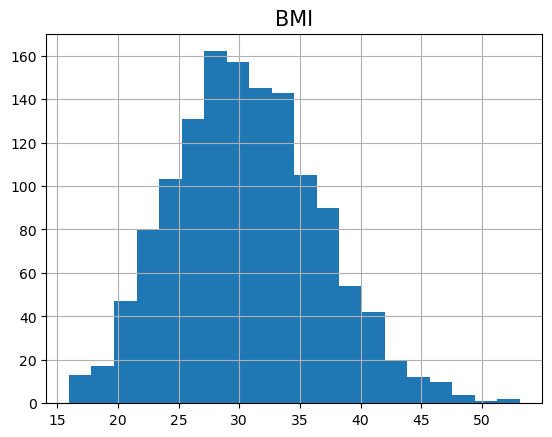

In [11]:
# histogramm - before data cleaning
insurance_df["bmi"].hist(bins=20)
plt.title("BMI", size=15);
plt.show()

#### Check if there are any outliers in the "bmi" variable

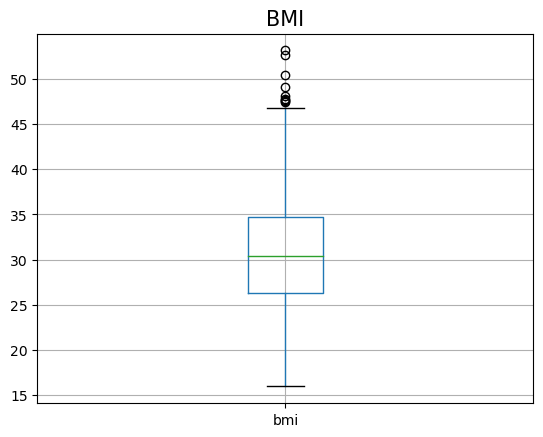

In [12]:
# boxplot - before data cleaning
insurance_df.boxplot(column = "bmi")
plt.title("BMI", size=15)
plt.show()

The rows with BMI > 50 can be removed as they are outliers.

In [13]:
# unique values in the "sex" column
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [14]:
# convert categorical values to numerical in the "sex" column
insurance_df['sex'] = insurance_df['sex'].apply(lambda x: 0 if x == "female" else 1)

In [15]:
# unique values in the "smoker" column
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [16]:
# convert categorical values to numerical in the "smoker" column
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == "no" else 1).astype("int")

#### Relationship between "smoker" and "charges"

In [17]:
insurance_df[ ["smoker", "charges"] ].corr()

,smoker,charges
smoker,1.000000,0.787251
charges,0.787251,1.000000


#### Region with the most children

In [18]:
insurance_df[ ["region", "children"] ].groupby("region").agg(["mean", "count"])

children      
               mean count
region                   
northeast  1.046296   324
northwest  1.147692   325
southeast  1.049451   364
southwest  1.141538   325

The average number of children is the highest in region Northwest (1.1477). Most children are in region Southeast (364).

In [19]:
# unique values in the "region" column
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
# single column for each region
region_dummies = pd.get_dummies(insurance_df['region'])

In [21]:
region_dummies.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [22]:
# adding columns with each region and deleting the "region" column
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)
insurance_df.drop(['region'], axis = 1, inplace = True)

In [23]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [24]:
insurance_df[ ["smoker", "charges"] ].corr()

,smoker,charges
smoker,1.000000,0.787251
charges,0.787251,1.000000


#### Relationship between "smoker" and "region"

In [25]:
insurance_df.corr()['smoker'][ ['northeast', 'northwest', 'southeast', 'southwest'] ]
#insurance_df[ insurance_df["smoker"], insurance_df["northeast", "northwest", "southeast", "southwest"] ].corr()

northeast    0.002811
northwest   -0.036945
southeast    0.068498
southwest   -0.036945
Name: smoker, dtype: float64

There is a light positive correlation between the regions: Northeast and Southeast and the smoker habit and a light negative correlation between the regions: Northwest and Southwest and the "smoker".

#### Relationship between "bmi" and "sex"

In [26]:
round(insurance_df.corr()["bmi"]["sex"], 4)

0.0464

There is a light positive correlation between the variables: "bmi" and "sex"

#### Relationship between "age" and "bmi"

In [27]:
round(insurance_df.corr()["age"]["bmi"], 4)

0.1093

#### Relationship between "bmi" and "children"

In [28]:
round(insurance_df.corr()["bmi"]["children"], 4)

0.0128

There is a light positive correlation between the variables: "bmi" and "children"

### Data visualisation to examine the data

age:


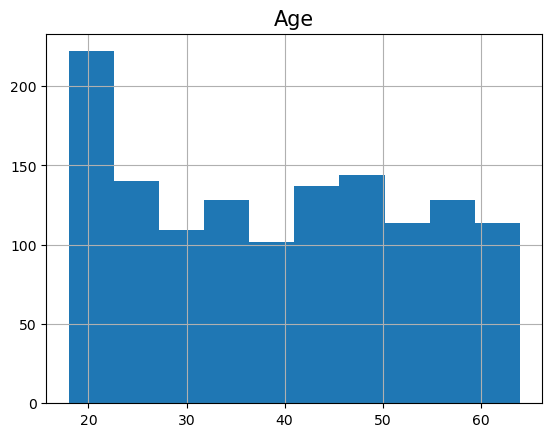

sex:


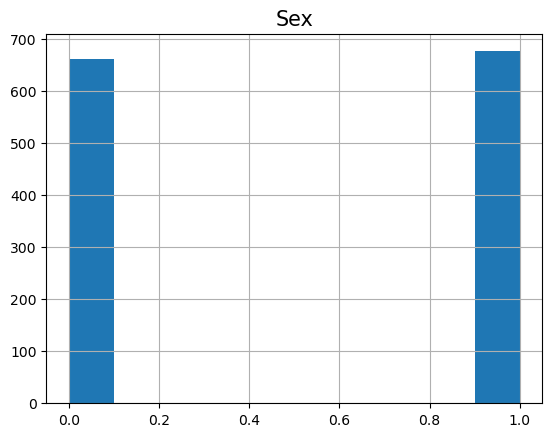

bmi:


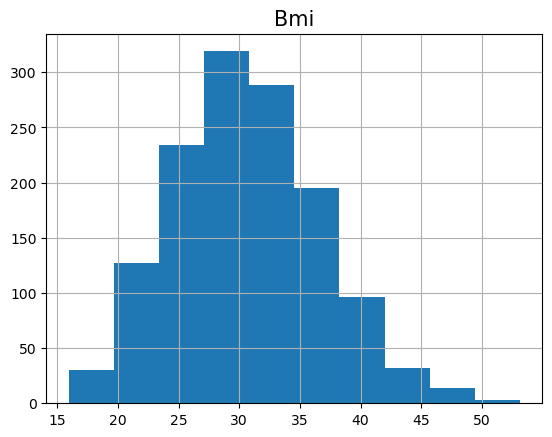

children:


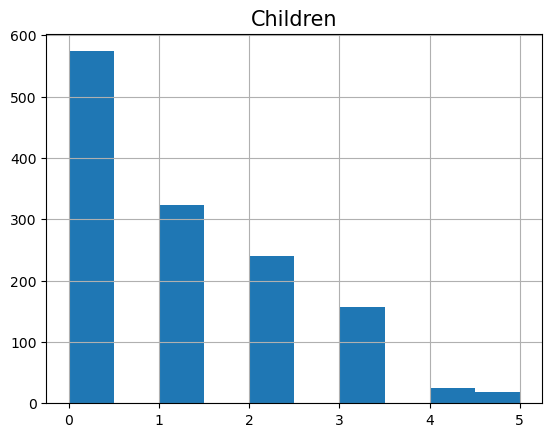

smoker:


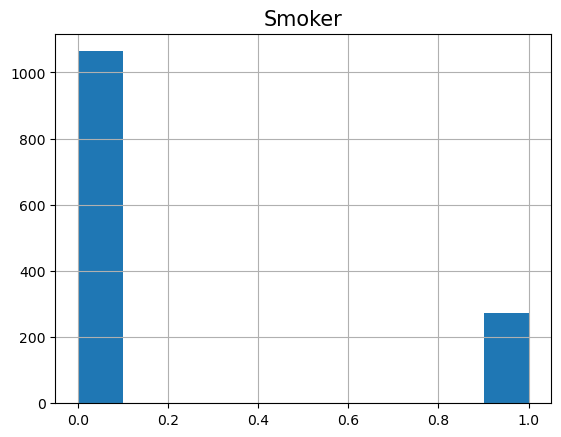

charges:


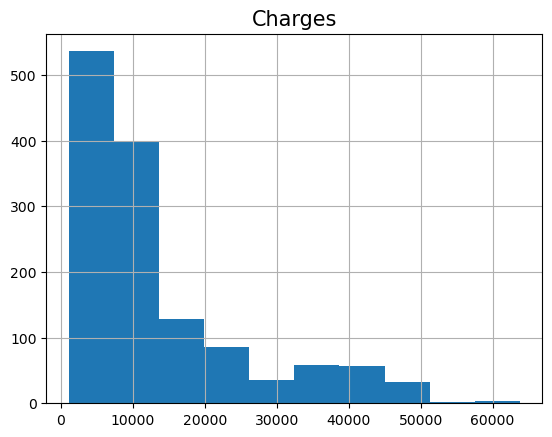

northeast:


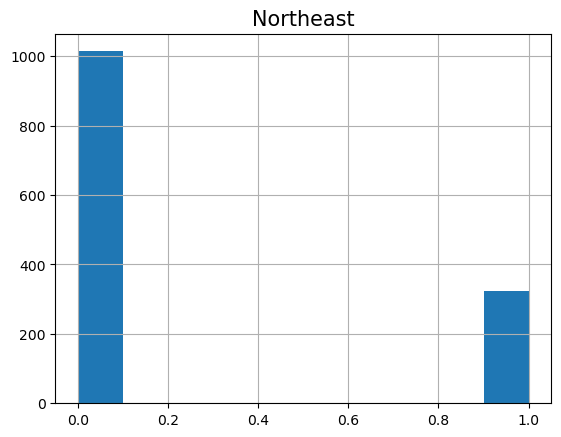

northwest:


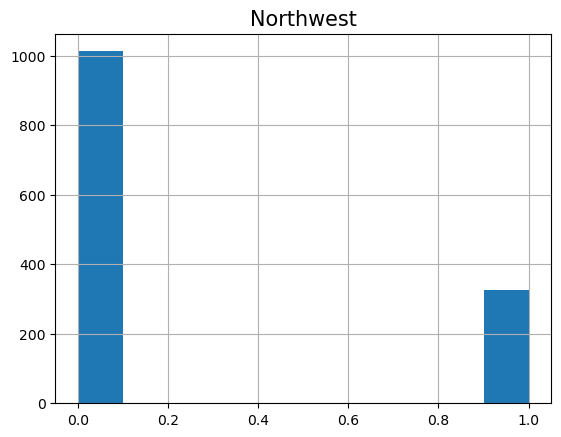

southeast:


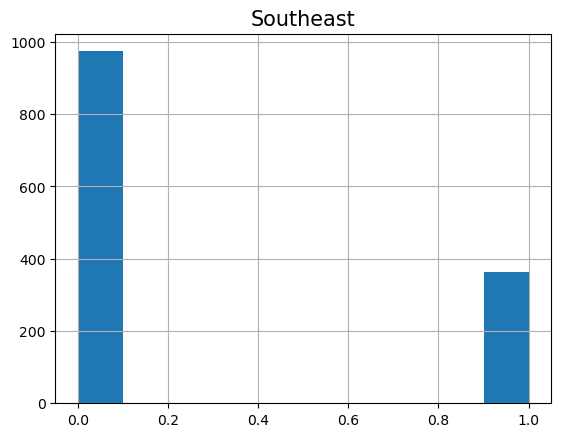

southwest:


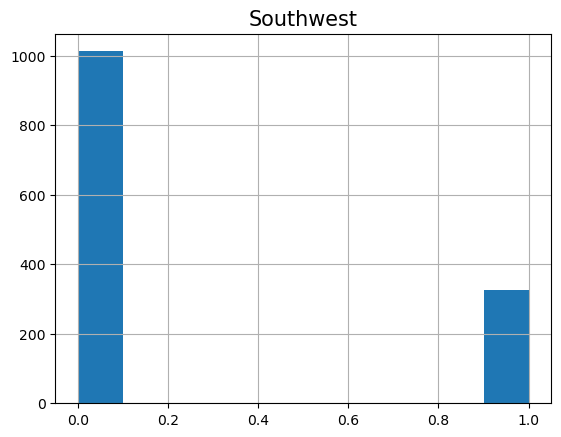

In [29]:
# histograms

feats = ['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northeast',
       'northwest', 'southeast', 'southwest']

for feat in feats:
    print(feat + ":")
    insurance_df[feat].hist(bins=10)
    plt.title(feat.title(), size=15);
    plt.show()

age:


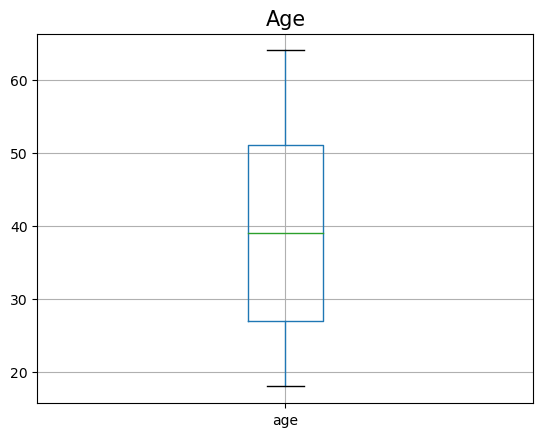

sex:


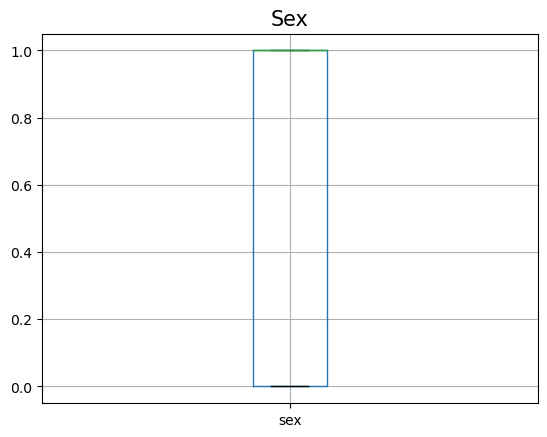

bmi:


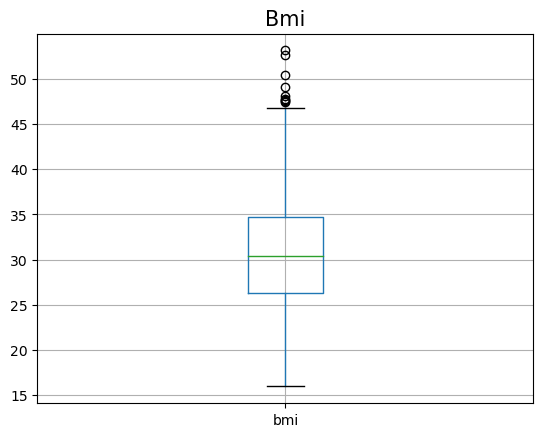

children:


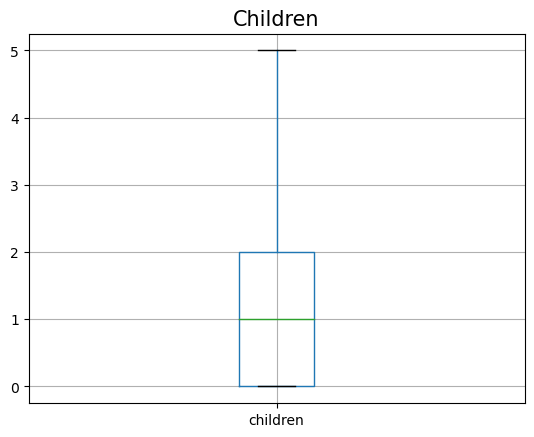

smoker:


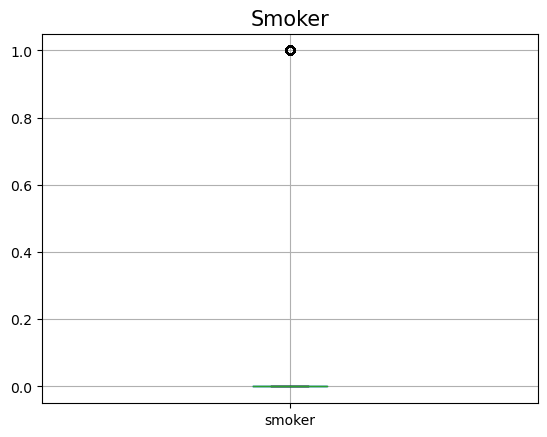

charges:


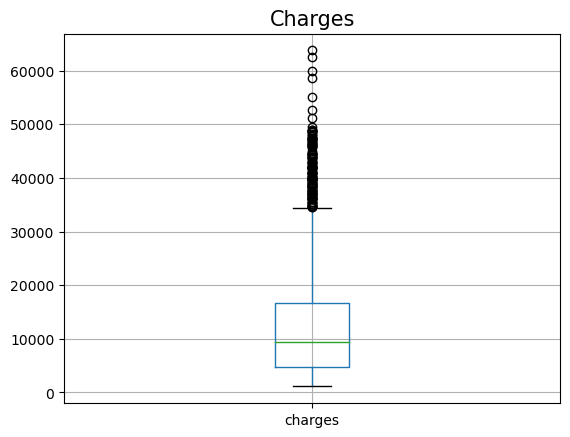

northeast:


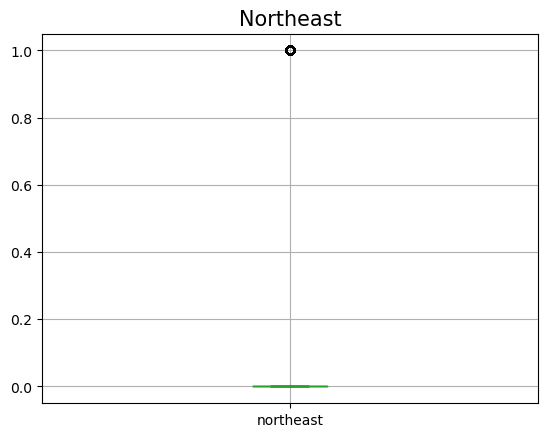

northwest:


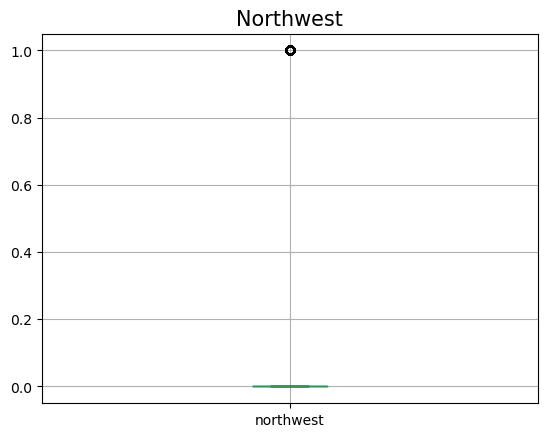

southeast:


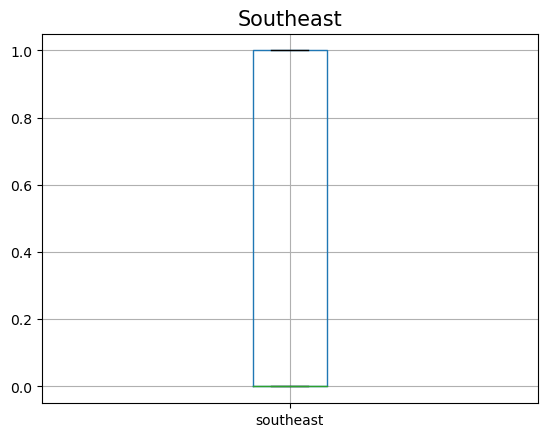

southwest:


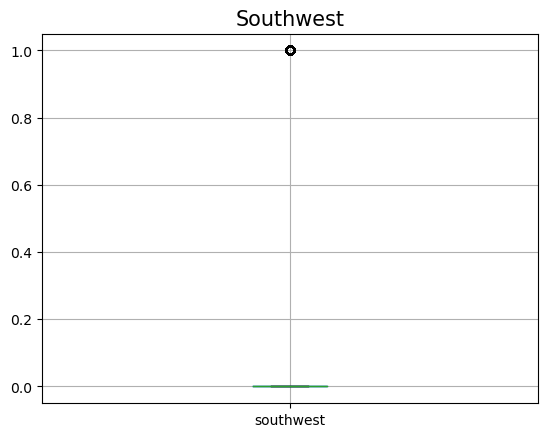

In [30]:
# boxplots

feats = ['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northeast',
       'northwest', 'southeast', 'southwest']

for feat in feats:
    print(feat + ":")
    insurance_df.boxplot(column = feat, vert=True)
    plt.title(feat.title(), size=15)
    plt.show()

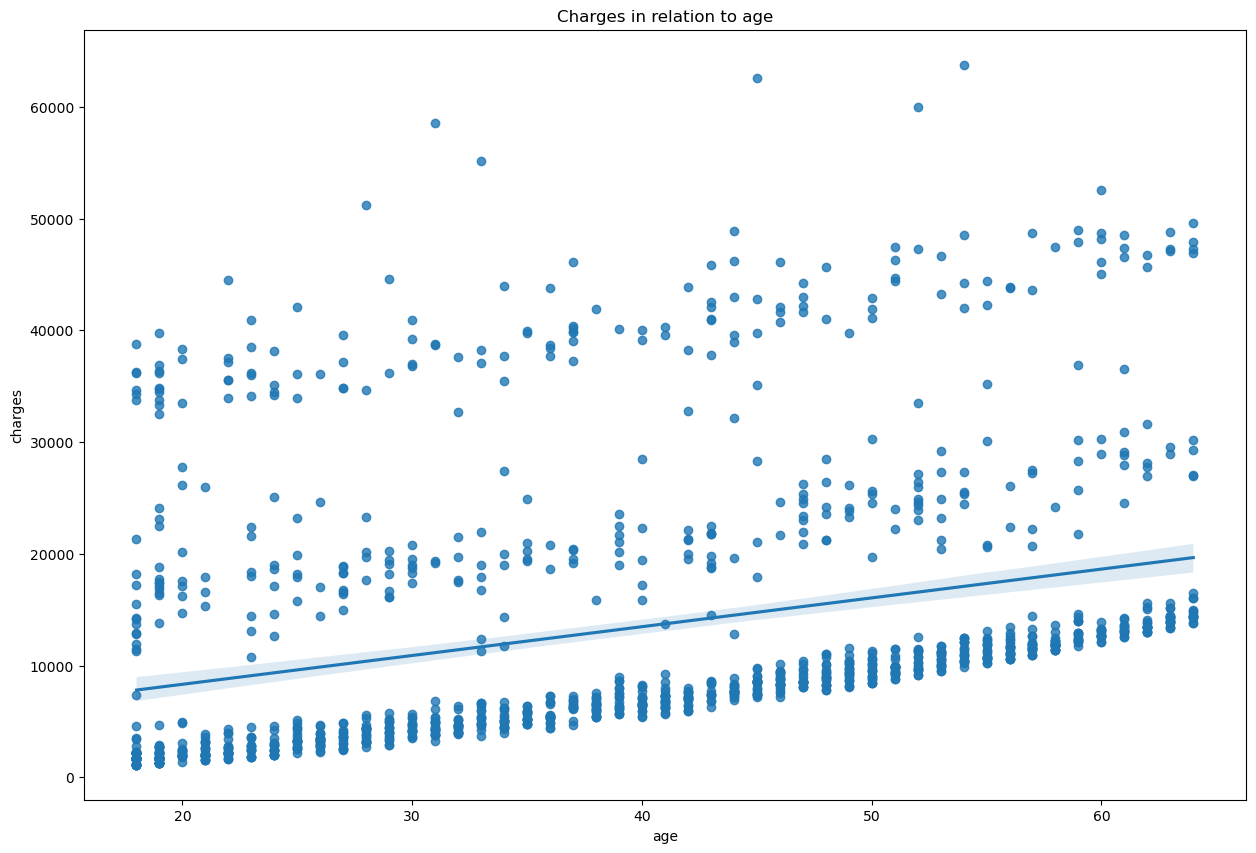

In [31]:
plt.figure(figsize = (15, 10))
sns.regplot(x = 'age', y = 'charges', data = insurance_df).set(title='Charges in relation to age')
plt.show()

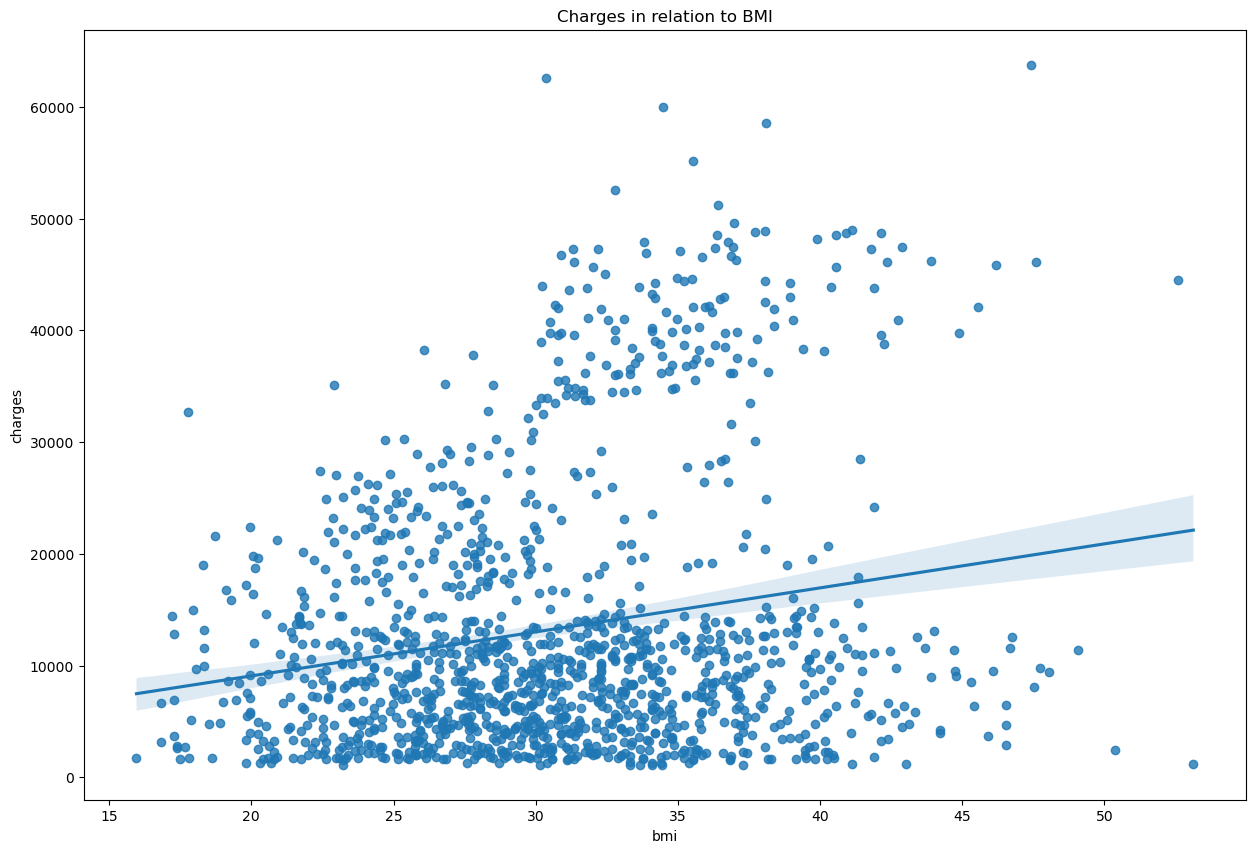

In [32]:
plt.figure(figsize = (15, 10))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df).set(title='Charges in relation to BMI')
plt.show()

#### Correlation matrix

In [33]:
# correlation between the target variable and independent variables
insurance_df.corr()['charges'].sort_values(ascending=False)

charges      1.000000
smoker       0.787251
age          0.299008
bmi          0.198341
southeast    0.073982
children     0.067998
sex          0.057292
northeast    0.006349
northwest   -0.039905
southwest   -0.043210
Name: charges, dtype: float64

The variables: "smoker", "age" and "bmi" have the highest positive influence on the medical costs

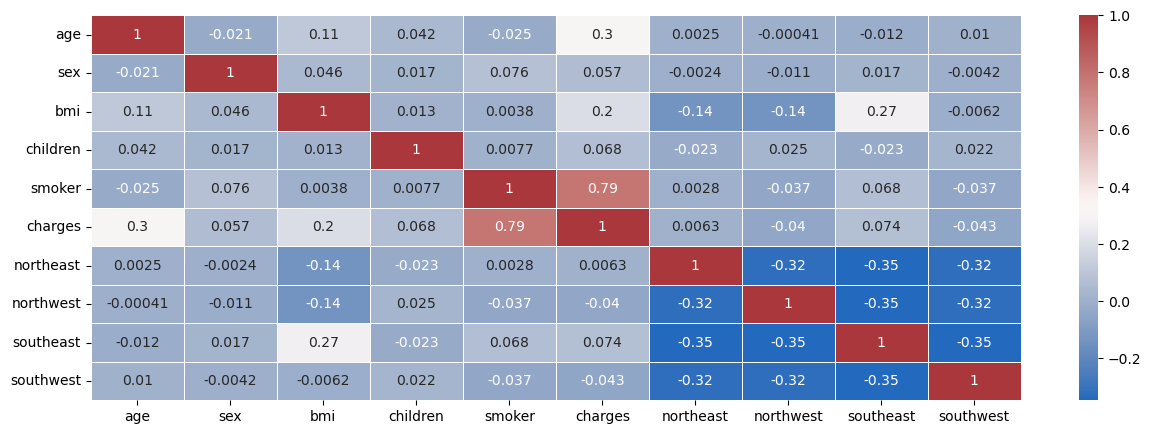

In [34]:
# visual presentation of correlation in form of a heatmap with values
plt.figure(figsize = (15,5))
sns.heatmap(insurance_df.corr(), annot=True, linewidths=.5, cmap='vlag')
plt.show()

### Data preprocessing

#### Removing the rows where BMI > 50

In [35]:
insurance_df.drop(insurance_df[insurance_df.bmi > 50].index, inplace = True)

In [36]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [37]:
insurance_df.shape

(1335, 10)

In [38]:
insurance_df['bmi'].max()

49.06

#### Split into the train and test datasets

In [39]:
# column names in the DataFrame
list(insurance_df.columns)

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'charges',
 'northeast',
 'northwest',
 'southeast',
 'southwest']

In [40]:
# division into input and target variables
X = insurance_df.drop(columns = ['charges'])
y = insurance_df['charges']

In [41]:
X.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


In [42]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [43]:
print(X.shape, y.shape)

(1335, 9) (1335,)


In [44]:
# converting of data into the numpy array and of type float
X = np.array(X).astype(float)
y = np.array(y).astype(float)

In [45]:
y = y.reshape(-1, 1)


In [46]:
X

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]])

In [47]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [48]:
# scaling the data // StandardScaler() will transform each value in the column 
# to range about the mean 0 and standard deviation 1

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [49]:
# splitting the data into 80% train dataset and 20% test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print("X_train.shape:", X_train.shape, "X_test.shape:", X_test.shape, "y_train.shape:", y_train.shape, "y_test.shape:", y_test.shape)

X_train.shape: (1068, 9) X_test.shape: (267, 9) y_train.shape: (1068, 1) y_test.shape: (267, 1)


### Model selection

#### Linear regression model

In [50]:
# Linear regression model and training the model
regr_model_sklearn = LinearRegression()
regr_model_sklearn.fit(X_train, y_train)

LinearRegression()

In [51]:
# accuracy of the model
regr_model_sklearn_accur = regr_model_sklearn.score(X_test, y_test)
regr_model_sklearn_accur

0.7633345928622398

In [52]:
# applying of predict() method on X_test
y_pred = regr_model_sklearn.predict(X_test)

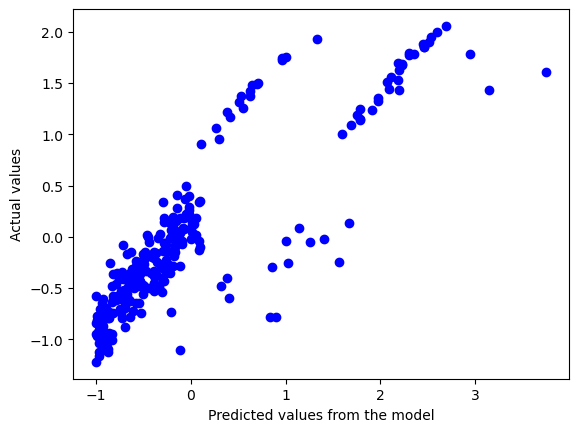

In [53]:
# comparison of predicted and actual scaled values
plt.plot(y_test, y_pred, "o", color = "b")
plt.xlabel('Predicted values from the model')
plt.ylabel('Actual values');

In [54]:
# inverse transformation in order to have the original values
y_pred_orig = scaler_y.inverse_transform(y_pred)
y_test_orig = scaler_y.inverse_transform(y_test)

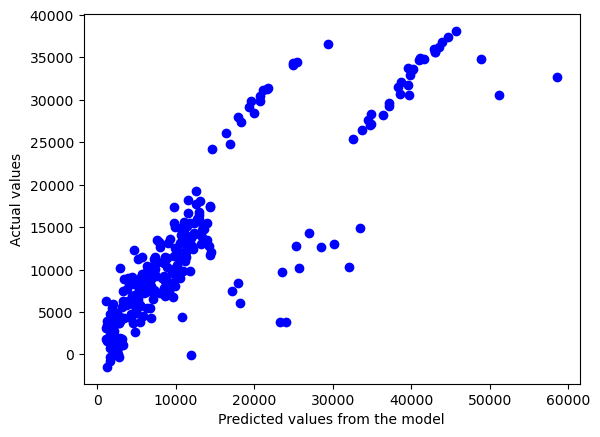

In [55]:
# comparison of predicted and actual original values (not scaled anymore)
plt.plot(y_test_orig, y_pred_orig, "o", color = 'b')
plt.xlabel('Predicted values from the model')
plt.ylabel('Actual values');

In [56]:
# calculation of the metrics
rmse = mean_squared_error(y_test_orig, y_pred_orig, squared=False)
mse = mean_squared_error(y_test_orig, y_pred_orig)
mae = mean_absolute_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)
print("RMSE:", round(rmse, 2), "MSE:", round(mse, 2), "MAE:", round(mae, 2), "R2:", round(r2, 4))

RMSE: 5864.77 MSE: 34395577.23 MAE: 4080.87 R2: 0.7633


That is a quite good result with 76.33% accuacy, 76.33% variation in the target are represented by variation in the input.

### Model optimization

In [57]:
# artificial neuronetwork model
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 9))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                500       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 activation_2 (Activation)   (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                7

In [58]:
# compiling of the model, we want to minimize the loss
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')
epochs_history = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
43/43 [==============================] - 1s 7ms/step - loss: 0.3761 - val_loss: 0.2948
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1682 - val_loss: 0.2505
Epoch 3/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1654 - val_loss: 0.2705
Epoch 4/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1379 - val_loss: 0.2426
Epoch 5/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1330 - val_loss: 0.2578
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1320 - val_loss: 0.2445
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1232 - val_loss: 0.2444
Epoch 8/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1204 - val_loss: 0.2723
Epoch 9/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1167 - val_loss: 0.2529
Epoch 10/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1237 - val_loss: 0.2535
Epoch 11/

In [59]:
res = ANN_model.evaluate(X_test, y_test)
ANN_accur = 1 - res
print("Accuracy:", round(ANN_accur, 4))

9/9 [==============================] - 0s 2ms/step - loss: 0.1949
Accuracy: 0.8051


In [60]:
y_pred = ANN_model.predict(X_test)

9/9 [==============================] - 0s 2ms/step


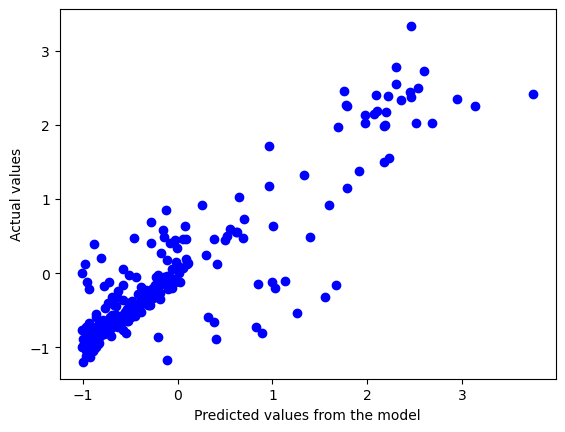

In [61]:
# comparison of predicted and actual scaled values
plt.plot(y_test, y_pred, "o", color = "b")
plt.xlabel('Predicted values from the model')
plt.ylabel('Actual values');

In [62]:
# inverse transformation to get the original numbers
y_pred_orig = scaler_y.inverse_transform(y_pred)
y_test_orig = scaler_y.inverse_transform(y_test)

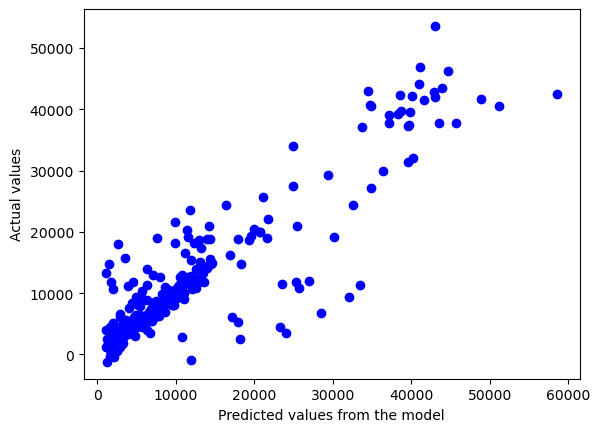

In [63]:
# comparison of predicted and actual original values (not scaled anymore)
plt.plot(y_test_orig, y_pred_orig, "o", color = 'b')
plt.xlabel('Predicted values from the model')
plt.ylabel('Actual values');

In [64]:
# calculation of the metrics after model optimization
rmse = mean_squared_error(y_test_orig, y_pred_orig, squared=False)
mse = mean_squared_error(y_test_orig, y_pred_orig)
mae = mean_absolute_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)
print("RMSE:", round(rmse, 2), "MSE:", round(mse, 2), "MAE:", round(mae, 2), "R2:", round(r2, 4))

RMSE: 5333.97 MSE: 28451276.67 MAE: 3051.89 R2: 0.8042


The model after optimization has better accuracy than the previous one (80.42% vs. 76.33% before optimization).